In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
raw_data=pd.read_csv(r"C:\Users\Elif\Desktop\violence_data.csv")
raw_data.head()  #Returning the first 5 rows to test if the excel file has the right type of data

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [3]:
raw_data.describe()  #Calculating and displaying summary statistics in dataset

,RecordID,Value
count,12600.000000,11187.000000
mean,210.500000,19.762537
std,121.248024,16.986437
min,1.000000,0.000000
25%,105.750000,6.200000
50%,210.500000,14.900000
75%,315.250000,29.200000
max,420.000000,86.900000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [5]:
raw_data.Country.unique()

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

In [6]:
raw_data.Question.unique()

array(['... if she burns the food',
       '... for at least one specific reason',
       '... if she argues with him',
       '... if she goes out without telling him',
       '... if she neglects the children',
       '... if she refuses to have sex with him'], dtype=object)

In [7]:
#Examining it on the graph by randomly selecting an undeveloped country from the dataset.
Pakistan = raw_data[raw_data.Country == 'Pakistan']
Pakistan.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
9180,402,Pakistan,F,Age,15-24,... for at least one specific reason,01/01/2017,45.1
9181,402,Pakistan,F,Age,25-34,... for at least one specific reason,01/01/2017,40.5
9182,402,Pakistan,F,Age,35-49,... for at least one specific reason,01/01/2017,39.6
9183,122,Pakistan,F,Age,15-24,... if she argues with him,01/01/2017,35.0
9184,122,Pakistan,F,Age,25-34,... if she argues with him,01/01/2017,30.9


Text(0.5, 1.05, 'Pakistans public agreeing a husband is justified in hitting his wife')

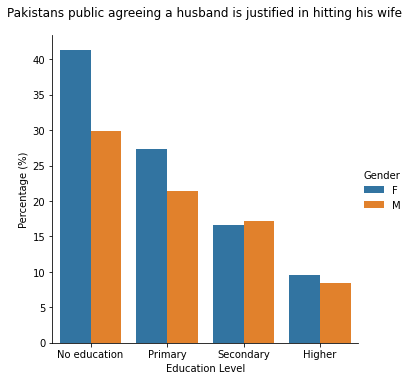

In [8]:
graph = Pakistan[Pakistan['Demographics Question'] == 'Education']

g = sns.catplot(x='Demographics Response',y='Value',hue='Gender',
                order=['No education','Primary','Secondary','Higher'],
                data=graph,kind='bar',ci=None)
g.set_axis_labels('Education Level','Percentage (%)')
g.fig.suptitle('Pakistans public agreeing a husband is justified in hitting his wife',y=1.05)

Text(0.5, 1.05, 'Those agreeing a husband is justified in hitting his wife')

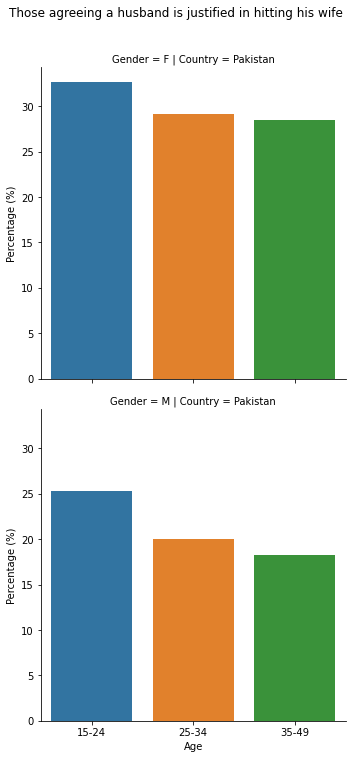

In [9]:
graph = Pakistan[Pakistan['Demographics Question'] == 'Age']

g = sns.catplot(x='Demographics Response',y='Value',col='Country',row='Gender',
                data=graph,kind='bar',ci=None)
g.set_axis_labels('Age','Percentage (%)')
g.fig.suptitle('Those agreeing a husband is justified in hitting his wife',y=1.05)

Text(0.5, 1.05, 'Afghanistan women agreeing a husband is justified in hitting his wife')

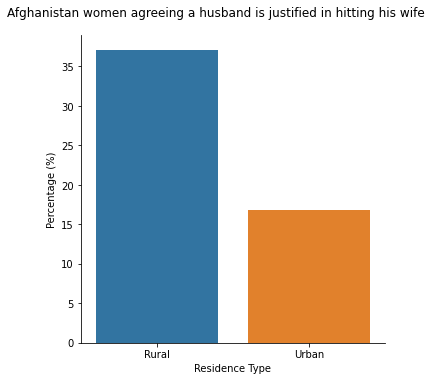

In [10]:
graph = Pakistan[(Pakistan['Demographics Question'] == 'Residence') & (Pakistan['Gender'] == 'F')]

g = sns.catplot(x='Demographics Response',y='Value',
                order=['Rural','Urban'],
                data=graph,kind='bar',ci=None)
g.set_axis_labels('Residence Type','Percentage (%)')
g.fig.suptitle('Afghanistan women agreeing a husband is justified in hitting his wife',y=1.05)

Text(0.5, 1.05, 'Ethiopians agreeing a husband is justified in hitting his wife')

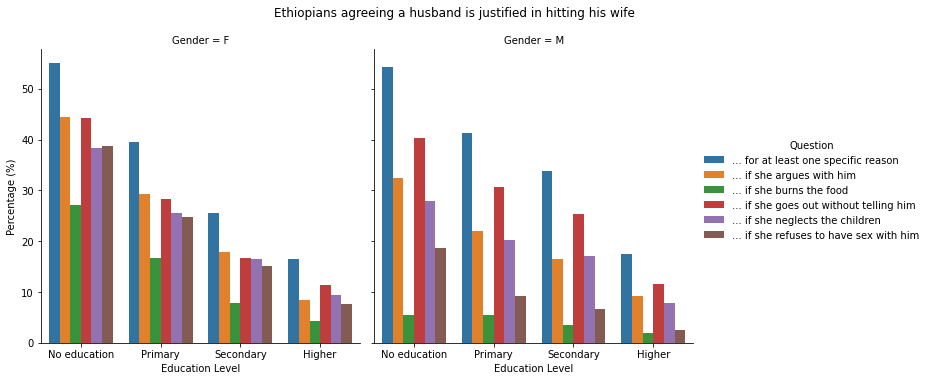

In [11]:
graph = Pakistan[Pakistan['Demographics Question'] == 'Education']

g = sns.catplot(x='Demographics Response',y='Value',col='Gender',hue='Question',
                order=['No education','Primary','Secondary','Higher'],
                data=graph,kind='bar',ci=None)
g.set_axis_labels('Education Level','Percentage (%)')
g.fig.suptitle('Ethiopians agreeing a husband is justified in hitting his wife',y=1.05)

In [12]:
#The dataset includes more than 70 countries. 
#8 countries were selected in order to get an idea about the level of developmentby choosing the countries 
#in different geographies.
cts=raw_data[(raw_data.Country == 'Afghanistan') | (raw_data.Country == 'Albania') | (raw_data.Country == 'Turkey') | 
            (raw_data.Country == 'Colombia') | (raw_data.Country == 'Pakistan') | (raw_data.Country == 'Moldova') |
            (raw_data.Country == 'Ukraine') | (raw_data.Country == 'Azerbaijan') ]

cts

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
12055,207,Ukraine,M,Residence,Urban,... if she goes out without telling him,01/01/2007,3.9
12056,277,Ukraine,M,Residence,Rural,... if she neglects the children,01/01/2007,10.5
12057,277,Ukraine,M,Residence,Urban,... if she neglects the children,01/01/2007,8.4
12058,347,Ukraine,M,Residence,Rural,... if she refuses to have sex with him,01/01/2007,2.7


In [13]:
cts_df=cts.drop(columns=['RecordID','Survey Year'])
cts_df

,Country,Gender,Demographics Question,Demographics Response,Question,Value
0,Afghanistan,F,Marital status,Never married,... if she burns the food,NaN
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8
...,...,...,...,...,...,...
12055,Ukraine,M,Residence,Urban,... if she goes out without telling him,3.9
12056,Ukraine,M,Residence,Rural,... if she neglects the children,10.5
12057,Ukraine,M,Residence,Urban,... if she neglects the children,8.4
12058,Ukraine,M,Residence,Rural,... if she refuses to have sex with him,2.7


In [14]:
    cts_df.dropna()

,Country,Gender,Demographics Question,Demographics Response,Question,Value
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8
5,Afghanistan,F,Employment,Employed for kind,... if she burns the food,17.0
...,...,...,...,...,...,...
12055,Ukraine,M,Residence,Urban,... if she goes out without telling him,3.9
12056,Ukraine,M,Residence,Rural,... if she neglects the children,10.5
12057,Ukraine,M,Residence,Urban,... if she neglects the children,8.4
12058,Ukraine,M,Residence,Rural,... if she refuses to have sex with him,2.7


In [15]:
cts_survey_df=cts_df.pivot_table(index=['Country','Gender','Demographics Question','Demographics Response'],
                                columns=['Question'],values=['Value'])
cts_survey_df


Value  \
Question                                                              ... for at least one specific reason   
Country     Gender Demographics Question Demographics Response                                               
Afghanistan F      Age                   15-24                                                        80.1   
                                         25-34                                                        81.5   
                                         35-49                                                        79.0   
                   Education             Higher                                                       61.1   
                                         No education                                                 81.0   
...                                                                                                    ...   
Ukraine     M      Marital status        Married or living together                                    8.9   
                                         Never married                                                11.5   
                                         Widowed, divorced, separated                                 22.0   
                   Residence             Rural                                                        13.9   
                                         Urban                                                        10.0   

                                                                                                  \
Question                                                              ... if she argues with him   
Country     Gender Demographics Question Demographics Response                                     
Afghanistan F      Age                   15-24                                              57.5   
                                         25-34                                              60.0   
                                         35-49                                              59.8   
                   Education             Higher                                             37.7   
                                         No education                                       60.2   
...                                                                                          ...   
Ukraine     M      Marital status        Married or living together                          3.2   
                                         Never married                                       6.1   
                                         Widowed, divorced, separated                       13.0   
                   Residence             Rural                                               6.8   
                                         Urban                                               4.6   

                                                                                                 \
Question                                                              ... if she burns the food   
Country     Gender Demographics Question Demographics Response                                    
Afghanistan F      Age                   15-24                                             17.3   
                                         25-34                                             18.2   
                                         35-49                                             18.8   
                   Education             Higher                                            10.1   
                                         No education                                      19.1   
...                                                                                         ...   
Ukraine     M      Marital status        Married or living together                         0.4   
                                         Never married                                      1.1   
                                         Widowed, divorced, separated 

In [16]:
    ctssurvey_df=cts_survey_df.T.reset_index(drop=True).T.reset_index()

In [17]:
#Rename columns
ctssurvey_df.columns=['Country',
                      'Gender',
                      'Demographics_question',
                      'Demographics_response',
                      'Violence_any_reason',
                      'Violence_argue',
                      'Violence_food',
                      'Violence_goingout',
                      'Violence_neglect',
                      'Violence_sex'
    
]



In [18]:
ctssurvey_df

,Country,Gender,Demographics_question,Demographics_response,Violence_any_reason,Violence_argue,Violence_food,Violence_goingout,Violence_neglect,Violence_sex
0,Afghanistan,F,Age,15-24,80.1,57.5,17.3,67.7,46.5,32.1
1,Afghanistan,F,Age,25-34,81.5,60.0,18.2,68.5,50.2,34.3
2,Afghanistan,F,Age,35-49,79.0,59.8,18.8,64.7,48.1,33.5
3,Afghanistan,F,Education,Higher,61.1,37.7,10.1,41.1,33.4,10.8
4,Afghanistan,F,Education,No education,81.0,60.2,19.1,68.4,48.9,34.2
...,...,...,...,...,...,...,...,...,...,...
205,Ukraine,M,Marital status,Married or living together,8.9,3.2,0.4,2.8,7.0,1.4
206,Ukraine,M,Marital status,Never married,11.5,6.1,1.1,4.3,9.3,2.1
207,Ukraine,M,Marital status,"Widowed, divorced, separated",22.0,13.0,1.2,11.5,19.0,3.4
208,Ukraine,M,Residence,Rural,13.9,6.8,0.9,5.0,10.5,2.7


In [19]:
new_df=ctssurvey_df.drop(columns=['Violence_any_reason','Violence_argue','Violence_food', 'Violence_goingout',
                                  'Violence_neglect','Violence_sex'])

In [20]:
new_df

,Country,Gender,Demographics_question,Demographics_response
0,Afghanistan,F,Age,15-24
1,Afghanistan,F,Age,25-34
2,Afghanistan,F,Age,35-49
3,Afghanistan,F,Education,Higher
4,Afghanistan,F,Education,No education
...,...,...,...,...
205,Ukraine,M,Marital status,Married or living together
206,Ukraine,M,Marital status,Never married
207,Ukraine,M,Marital status,"Widowed, divorced, separated"
208,Ukraine,M,Residence,Rural


In [21]:
new_df.dropna()

,Country,Gender,Demographics_question,Demographics_response
0,Afghanistan,F,Age,15-24
1,Afghanistan,F,Age,25-34
2,Afghanistan,F,Age,35-49
3,Afghanistan,F,Education,Higher
4,Afghanistan,F,Education,No education
...,...,...,...,...
205,Ukraine,M,Marital status,Married or living together
206,Ukraine,M,Marital status,Never married
207,Ukraine,M,Marital status,"Widowed, divorced, separated"
208,Ukraine,M,Residence,Rural


In [22]:
ctssurvey_df.to_excel('eightCountries.xlsx')